<a href="https://colab.research.google.com/github/tejuafonja/100-Days-Of-ML-Code/blob/master/demo/ppg_extractor_demo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
SECRET_API_KEY=""

!git clone "https://{SECRET_API_KEY}/AISaturdaysLagos/sautitranslate.git"
import os
os.chdir("sautitranslate")

!pip install -r requirements.txt

In [2]:
### MAKE SURE TO RESTART RUNTIME
import os
os.chdir("demo")
import sys
sys.path.append("..")

# PPG Extractor

A short demo to demonstrate how a ppg is extracted from an audio using the PPG Extractor.

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from sautitranslate.extractors import PPGExtractor
from sautitranslate.utils.plot_utils import (
    display_wav_from_file, 
    display_spectrogram_from_file, 
    play_audio_in_notebook,
)

import scipy.io as sio

# Instantiate PPG Extractor

In [4]:
ppg_extractor = PPGExtractor()

# Audio data

In [5]:
audio_file = "demo_data/1633180274545_REC1633180271630.wav"
wav, sr = librosa.load(audio_file)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [6]:
wav.shape, sr

((103194,), 22050)

Play audio

In [7]:
play_audio_in_notebook(audio_file)

audio wav

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


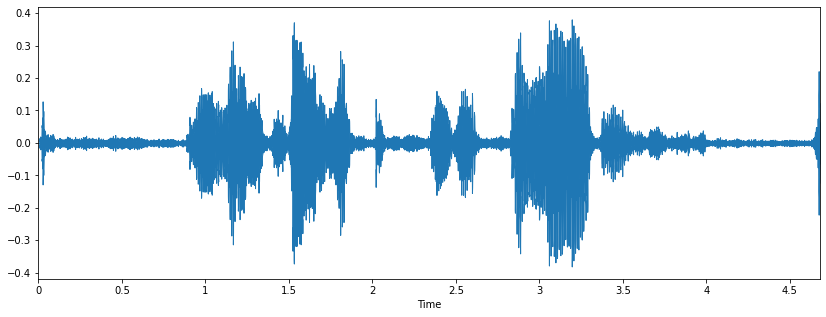

In [8]:
display_wav_from_file(audio_file)

spectrogram

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


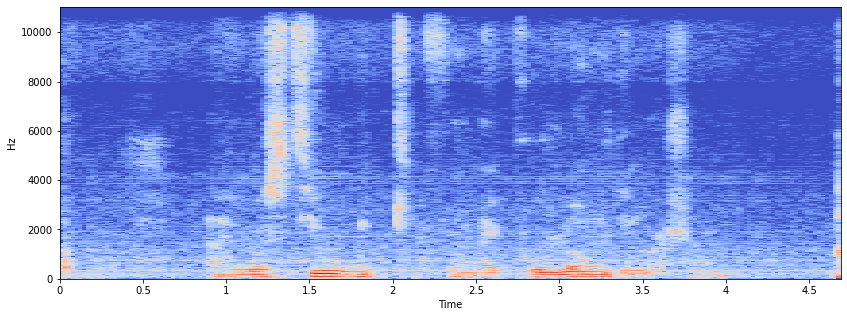

In [9]:
display_spectrogram_from_file(audio_file)

# Extract ppg

In [10]:
ppg = ppg_extractor.extract(audio_file)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [11]:
ppg.shape

(468, 5816)

In [12]:
# length of the audio
wav.shape[0]/sr 

4.68

The ppg is a 2D array showing the probabily of phonemes occuring at each time step. The loaded audio is lasted for 4.68 seconds.

Does the ppg shape above might imply that there are 5816 phonemes?

**Ascertain that the probabilies at each time sum to 1**

In [13]:
print(ppg.sum(axis=1))

[1.0000706  1.0000222  1.0000073  1.0000052  1.000005   1.0000038
 1.0000015  1.0000005  0.99999845 0.9999981  0.9999986  1.0000007
 1.0000026  1.0000019  1.000002   1.0000048  1.0000064  1.0000039
 1.0000025  0.9999989  1.0000036  1.0000074  1.0000049  0.9999988
 1.0000026  1.0000049  0.9999972  1.0000039  1.000003   1.0000012
 1.0000017  1.0000004  1.0000002  1.000004   1.0000021  1.0000021
 1.0000029  1.0000031  1.0000005  1.0000039  1.0000026  1.0000014
 1.0000017  1.0000025  1.0000019  1.0000087  0.9999976  0.9999946
 1.0000029  1.         1.000004   1.0000005  0.9999963  1.0000037
 0.99999857 1.000002   1.0000023  1.0000051  1.0000033  0.9999998
 1.0000025  1.0000019  1.0000023  1.0000088  0.99999744 1.000003
 1.0000015  1.0000008  0.99999887 0.9999965  0.99999744 1.0000024
 1.0000017  0.99999857 0.9999982  1.0000058  1.0000052  0.9999999
 1.0000112  1.0000017  1.0000043  1.0000026  1.0000098  0.99999845
 1.0000099  1.00002    1.0000137  1.0000064  0.999999   0.9999972
 1.0000005